In [ ]:
# imports
import pandas as pd
import os
import kagglehub
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# import kaggle 

In [5]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 19.6 MB/s eta 0:00:0000:0100:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 29.7 MB/s eta 0:00:00
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
# imports
import pandas as pd
import os
import kagglehub
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# import kaggle 



/Users/kai/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/kai/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
import pickle

with open("edges_df_sorted.pk1", "rb") as f:
    edges_df_sorted = pickle.load(f)

with open("edges_df.pk1", "rb") as f:
    edges_df = pickle.load(f)
    
with open("df_aggregated.pk1", "rb") as f:
    df_aggregated = pickle.load(f)




In [8]:
edges_df

,Disease1,Disease2,Weight
0,abdominal aortic aneurysm,abdominal hernia,1
1,abdominal aortic aneurysm,abscess of the lung,1
2,abdominal aortic aneurysm,acute bronchiolitis,1
3,abdominal aortic aneurysm,acute bronchitis,1
4,abdominal aortic aneurysm,acute bronchospasm,1
...,...,...,...
66556,white blood cell disease,whooping cough,2
66557,white blood cell disease,wilson disease,1
66558,white blood cell disease,yeast infection,1
66559,whooping cough,wilson disease,1


In [9]:
#ignore, didn't know 'pain after an operation' would be a disease
disease_of_interest = "pain after an operation"

filtered_edges = edges_df[(edges_df["Disease1"] == disease_of_interest) | (edges_df["Disease2"] == disease_of_interest)]

print(filtered_edges)

                        Disease1                  Disease2  Weight
184    abdominal aortic aneurysm   pain after an operation       2
391             abdominal hernia   pain after an operation       2
602              abscess of nose   pain after an operation       1
1110      abscess of the pharynx   pain after an operation       2
1548                   achalasia   pain after an operation       1
...                          ...                       ...     ...
59615    pain after an operation                vulvodynia       5
59616    pain after an operation  white blood cell disease       3
59617    pain after an operation            whooping cough       1
59618    pain after an operation           yeast infection       1
59619    pain after an operation       zenker diverticulum       1

[390 rows x 3 columns]


In [10]:
G = nx.Graph()

for _, row in edges_df.iterrows():
    G.add_edge(row["Disease1"], row["Disease2"], weight=row["Weight"])

print("Nodes:", G.number_of_nodes())

print("Edges:", G.number_of_edges())
print("Network Density" , nx.density(G))
#Network density is 0.22, which is fairly low. 1.0 would be a fully connected graph
#There are some distinct cluters, some diseases share symptoms, and others are only connected to a few
#Some diseases have a specific symptom profile



Nodes: 773
Edges: 66561
Network Density 0.2230760981037476


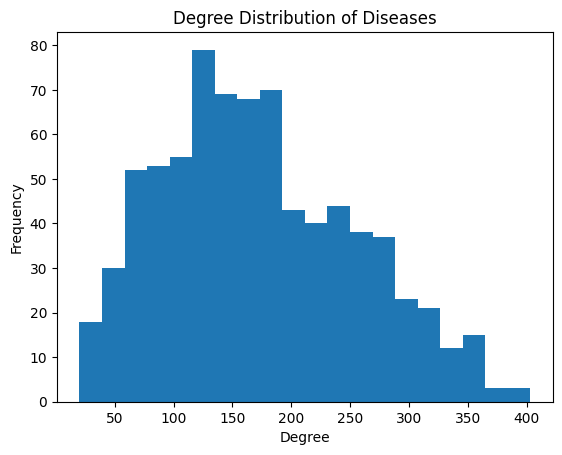

In [11]:
degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees, bins=20)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution of Diseases")
plt.show()

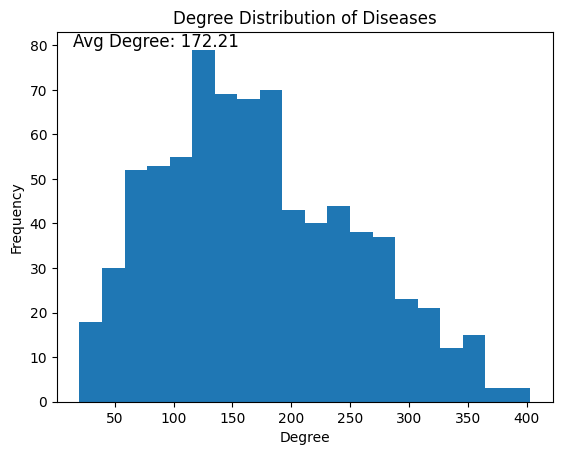

In [12]:
average_degree = np.mean(degrees)

# Plot histogram
plt.hist(degrees, bins=20)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution of Diseases")

# Display average degree in the plot
plt.figtext(0.15, 0.85, f'Avg Degree: {average_degree:.2f}', fontsize=12)

plt.show()

In [ ]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

In [ ]:
print("Top 5 diseases by Degree Centrality:", sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
#these diseases have the highest number of direct symptom based connections to other diseases

#Drug reaction:
    #high connectivity suggests drug-induced conditions are frequently misdiagnosed as other illnesses.
    
#Pain after an operation:
    #Post operation pain is common across many surgical procedures and may be mistaken for underlying infections or some other issues
    
#Shingles:
    #High centrality suggests it may often be confused with other viral infections or autoimmune conditions.
    
#Acute Stress Reaction:
    #indicates stress-related symptoms might contribute to misdiagnosis of physical diseases.
    



Top 5 diseases by Degree Centrality: [('hypokalemia', 0.522020725388601), ('drug reaction', 0.5077720207253886), ('pain after an operation', 0.5051813471502591), ('shingles (herpes zoster)', 0.49093264248704666), ('acute stress reaction', 0.48704663212435234)]


In [ ]:
print("Top 5 diseases by Betweenness Centrality:", sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

#Shingles:
    #Shingles has symptoms (nerve pain, rashes, fever) that overlap with both viral infections and autoimmune conditions.
    #This suggests shingles acts as a key diagnostic confusion point, potentially being mistaken for other neurological, dermatological, or viral illnesses.
    
#Parasitic disease:
    #Many parasitic diseases have vague symptoms (abdominal pain, diarrhea, fatigue), which means they might connect conditions like food poisoning, viral infections, and malabsorption disorders.
    
#Drug Reaction:
    #High betweenness suggests that drug reactions bridge multiple medical conditions, leading to frequent confusion with infections, allergies, or autoimmune issues.
    
#These diseases connect different clusters, making them major misdiagnosis risks.
#Doctors should carefully differentiate these from diseases in both of their clusters.



Top 5 diseases by Betweenness Centrality: [('shingles (herpes zoster)', 0.008302474423198791), ('lyme disease', 0.006565076328624316), ('parasitic disease', 0.005502711106188218), ('lymphadenitis', 0.005303623907557194), ('drug reaction', 0.005164641297152865)]


In [ ]:
print("Top 5 diseases by Closeness Centrality:", sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
#These diseases are highly reachable in the network, meaning they are common misdiagnosis or differential diagnosis candidates.
#Doctors should always consider these diseases in diagnostic decisions since they connect to many symptomatically similar conditions.
#These diseases may be important in machine learning models for automated diagnosis, as they likely appear as early-stage possibilities in differential diagnoses.



Top 5 diseases by Closeness Centrality: [('hypokalemia', 0.6765994741454864), ('drug reaction', 0.6701388888888888), ('pain after an operation', 0.6689774696707106), ('shingles (herpes zoster)', 0.6626609442060086), ('acute stress reaction', 0.660958904109589)]


In [ ]:
print("Top 5 diseases by Eigenvector Centrality:", sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5])


#Since it is so interconnected, doctors should always consider checking for underlying causes of hypokalemia, as it may be a secondary symptom of another major condition.

#understanding postoperative symptom patterns could help reduce unnecessary tests and avoid confusion with unrelated conditions.

#These diseases act as key “hubs” in the network, influencing diagnosis patterns across multiple categories.
#Diseases with high eigenvector centrality may serve as key “signals” in differential diagnosis algorithms.
#Misdiagnosis risks are high when these diseases are confused with others that have similar symptoms but different underlying causes.

Top 5 diseases by Eigenvector Centrality: [('hypokalemia', 0.0820095696120754), ('pain after an operation', 0.07735926826671709), ('gastritis', 0.07639006170018713), ('drug reaction', 0.07499439055255328), ('acute kidney injury', 0.07408833976707525)]
